Estrutura de dados no Pandas
* Series 
  * Array unidimencional -> como uma coluna no excel
  * Dataframe -> o excel todo

In [1]:
import pandas as pd
import numpy as np

In [2]:
series = pd.Series([7,8,9,10,11])
series

0     7
1     8
2     9
3    10
4    11
dtype: int64

In [3]:
type(series)

pandas.core.series.Series

In [4]:
#passando um ndarray
pd.Series(np.array(['f','h','i','j']),index=[1,2,3,4])

1    f
2    h
3    i
4    j
dtype: object

In [5]:
#passando um dicionário
pd.Series({'a':99,'b':12,'c':7,'d':56,'e':39})

a    99
b    12
c     7
d    56
e    39
dtype: int64

In [6]:
#passando constante
pd.Series(100, index = np.arange(1,11))

1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
dtype: int64

Acessando os elementos de uma Series

In [7]:
np.random.seed(7)
data = np.random.randint(low = 1, high=100, size = 8)
index = ['a','b','c','d','e','f','g','h']
series = pd.Series(data, index = index)

In [8]:
series.head()

a    48
b    69
c    26
d    68
e    84
dtype: int32

In [9]:
series.tail()

d    68
e    84
f    24
g    93
h    58
dtype: int32

<AxesSubplot:>

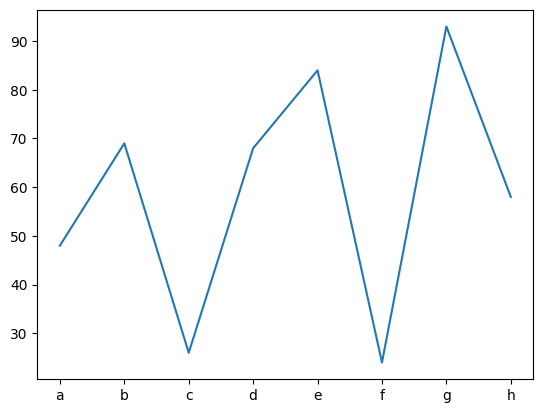

In [10]:
series.plot()

In [11]:
#primeiro elemento
series[0]
#outras formas
series[-1:]
series[:5]
series[1:5]

b    69
c    26
d    68
e    84
dtype: int32

Acessar o elemento pelo label

In [12]:
series['a']

48

In [13]:
series.get('a')

48

In [14]:
series['a':'d']

a    48
b    69
c    26
d    68
dtype: int32

In [15]:
series[['a','c','f']]

a    48
c    26
f    24
dtype: int32

Verificando atributos do objeto

In [16]:
series.shape

(8,)

In [17]:
series.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], dtype='object')

In [18]:
series.values

array([48, 69, 26, 68, 84, 24, 93, 58])

In [19]:
#numero de dimensões
series.ndim

1

In [20]:
type(series.values)

numpy.ndarray

Aplicando estatística descritiva 

In [21]:
notas = [7,9,8,5]
alunos = ['Lucas','Lais','Tales','Rebeca']
series = pd.Series(notas, index=alunos, name = 'Notas Matemática')

In [22]:
series

Lucas     7
Lais      9
Tales     8
Rebeca    5
Name: Notas Matemática, dtype: int64

In [23]:
series.mean()

7.25

In [24]:
#desvio padrão
series.std()

1.707825127659933

In [25]:
#variancia
series.var()

2.9166666666666665

In [26]:
series.median()

7.5

In [27]:
series.max()

9

In [28]:
series.idxmax()

'Lais'

In [29]:
series.min()

5

In [30]:
series.idxmin()

'Rebeca'

Operações com Series

In [31]:
np.random.seed(8)
n = 5
notas_biologia = pd.Series(np.random.randint(1,10,size=n))
notas_matematica = pd.Series(np.random.randint(1,10,size=n))

In [32]:
notas_biologia+notas_matematica

0     8
1    14
2     3
3    12
4    11
dtype: int32

In [33]:
notas_biologia-notas_matematica


0    0
1   -4
2    1
3    0
4    7
dtype: int32

In [34]:
notas_biologia/notas_matematica


0    1.000000
1    0.555556
2    2.000000
3    1.000000
4    4.500000
dtype: float64

In [35]:
notas_biologia*notas_matematica


0    16
1    45
2     2
3    36
4    18
dtype: int32

In [36]:
#media global
(notas_biologia+notas_matematica)/2

0    4.0
1    7.0
2    1.5
3    6.0
4    5.5
dtype: float64

In [37]:
notas_biologia>6

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [38]:
notas_biologia!=6

0     True
1     True
2     True
3    False
4     True
dtype: bool

In [39]:
notas_biologia[notas_biologia>=6]

3    6
4    9
dtype: int32

In [40]:
notas_biologia[notas_biologia==9]

4    9
dtype: int32

In [41]:
notas_biologia[notas_biologia!=9]


0    4
1    5
2    2
3    6
dtype: int32

In [42]:
#adicionando novas notas
notas_biologia[5]=9
notas_biologia[6]=9
notas_biologia[7]=4

In [43]:
#contando frequencias
notas_biologia.value_counts()

9    3
4    2
5    1
2    1
6    1
dtype: int64

In [44]:
#para ver como percentuais passar o normalize = True
notas_biologia.value_counts(normalize=True)*100

9    37.5
4    25.0
5    12.5
2    12.5
6    12.5
dtype: float64

Concatenação de Series

In [45]:
pd.concat([notas_biologia,notas_matematica],axis=0)

0    4
1    5
2    2
3    6
4    9
5    9
6    9
7    4
0    4
1    9
2    1
3    6
4    2
dtype: int64

In [46]:
notas = pd.concat([notas_biologia,notas_matematica],axis=1) #axis=1 concatena ao lado
notas

,0,1
0,4,4.0
1,5,9.0
2,2,1.0
3,6,6.0
4,9,2.0
5,9,NaN
6,9,NaN
7,4,NaN


In [47]:
notas.columns = ['Biologia','Matemática']

In [48]:
type(notas)

pandas.core.frame.DataFrame

In [49]:
notas.fillna(0,inplace=True)

In [50]:
notas['Media'] = notas.mean(axis=1)

In [51]:
notas

,Biologia,Matemática,Media
0,4,4.0,4.0
1,5,9.0,7.0
2,2,1.0,1.5
3,6,6.0,6.0
4,9,2.0,5.5
5,9,0.0,4.5
6,9,0.0,4.5
7,4,0.0,2.0


Visualização dos Dados

In [52]:
np.random.seed(9)
series = pd.Series(np.random.normal(80,1.5, size=50))

<AxesSubplot:>

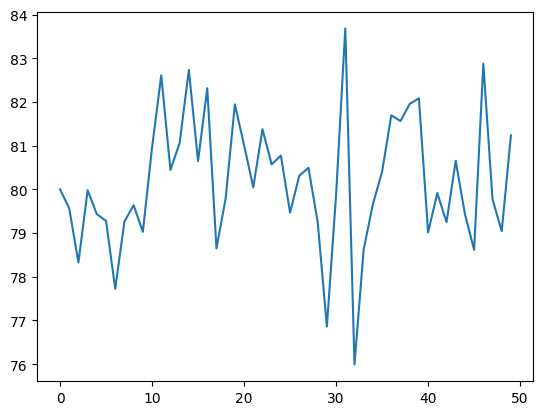

In [53]:
series.plot()

<AxesSubplot:ylabel='Frequency'>

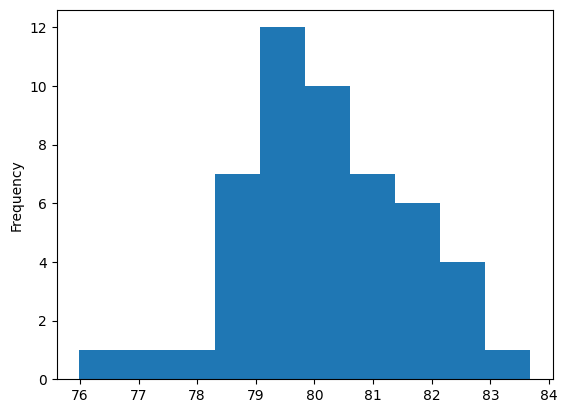

In [54]:
series.plot(kind = 'hist')

<AxesSubplot:>

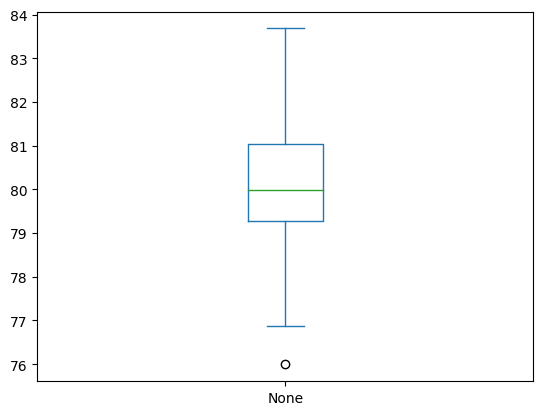

In [55]:
series.plot(kind = 'box')


Dataframe

In [56]:
nomes = ['Lucas','Gabriel','Lais','Neide','Tales','Rebeca']
notas_matematica = [7,9,10,8,5,9]
notas_biologia = [10,9,7,7,5,6]
data = {
    'Nome':nomes,
    'Matematica':notas_matematica,
    'Biologia': notas_biologia
}
df = pd. DataFrame(data)
df

,Nome,Matematica,Biologia
0,Lucas,7,10
1,Gabriel,9,9
2,Lais,10,7
3,Neide,8,7
4,Tales,5,5
5,Rebeca,9,6


In [57]:
#outro exemplo 
np.random.seed(10)
n = 100
escolaridade = ['Ensino fundamental','Ensino médio','Ensino Superior']
cidades = ['São Paulo','Recife','Salvador','Curitiba','Rio de Janeiro']
sexo = ['masculino','feminino']

data = {
    'Id':np.arange(1,n+1),
    'Idade':np.random.randint(18,70, size = n),
    'Renda':np.random.randint(1_500,10_000, size = n),
    'Sexo': np.random.choice(sexo, size=n),
    'Escolaridade': np.random.choice(escolaridade, size = n),
    'Cidade':np.random.choice(cidades,size=n)
}
df = pd.DataFrame(data)


In [58]:
df

,Id,Idade,Renda,Sexo,Escolaridade,Cidade
0,1,27,4297,masculino,Ensino médio,São Paulo
1,2,54,7957,feminino,Ensino Superior,Recife
2,3,33,6343,feminino,Ensino fundamental,Salvador
3,4,18,4366,feminino,Ensino fundamental,Salvador
4,5,67,4105,feminino,Ensino fundamental,Recife
...,...,...,...,...,...,...
95,96,67,2958,masculino,Ensino médio,Recife
96,97,33,5068,masculino,Ensino Superior,Recife
97,98,62,7176,masculino,Ensino médio,Salvador
98,99,58,2375,feminino,Ensino Superior,Rio de Janeiro


Inspeção de dados

In [59]:
df.head()

,Id,Idade,Renda,Sexo,Escolaridade,Cidade
0,1,27,4297,masculino,Ensino médio,São Paulo
1,2,54,7957,feminino,Ensino Superior,Recife
2,3,33,6343,feminino,Ensino fundamental,Salvador
3,4,18,4366,feminino,Ensino fundamental,Salvador
4,5,67,4105,feminino,Ensino fundamental,Recife


In [60]:
df.tail(n = 10)

,Id,Idade,Renda,Sexo,Escolaridade,Cidade
90,91,29,3027,masculino,Ensino médio,Recife
91,92,66,5946,feminino,Ensino Superior,São Paulo
92,93,30,4658,masculino,Ensino médio,Recife
93,94,46,9121,masculino,Ensino fundamental,Recife
94,95,50,8457,feminino,Ensino médio,Curitiba
95,96,67,2958,masculino,Ensino médio,Recife
96,97,33,5068,masculino,Ensino Superior,Recife
97,98,62,7176,masculino,Ensino médio,Salvador
98,99,58,2375,feminino,Ensino Superior,Rio de Janeiro
99,100,60,4265,masculino,Ensino fundamental,Salvador


In [61]:
df.shape

(100, 6)

In [62]:
len(df)

100

In [63]:
df.size

600

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            100 non-null    int32 
 1   Idade         100 non-null    int32 
 2   Renda         100 non-null    int32 
 3   Sexo          100 non-null    object
 4   Escolaridade  100 non-null    object
 5   Cidade        100 non-null    object
dtypes: int32(3), object(3)
memory usage: 3.6+ KB


In [65]:
df.index

RangeIndex(start=0, stop=100, step=1)

In [66]:
df.columns

Index(['Id', 'Idade', 'Renda', 'Sexo', 'Escolaridade', 'Cidade'], dtype='object')

In [67]:
df.dtypes

Id               int32
Idade            int32
Renda            int32
Sexo            object
Escolaridade    object
Cidade          object
dtype: object

In [68]:
df.ndim

2

In [69]:
type(df.Idade)

pandas.core.series.Series

In [70]:
df.describe()

,Id,Idade,Renda
count,100.000000,100.000000,100.000000
mean,50.500000,43.140000,5885.120000
std,29.011492,14.227602,2328.749998
min,1.000000,18.000000,1912.000000
25%,25.750000,31.000000,3858.500000
50%,50.500000,42.000000,5944.500000
75%,75.250000,54.000000,7961.250000
max,100.000000,69.000000,9978.000000


In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,100.0,50.50,29.011492,1.0,25.75,50.5,75.25,100.0
Idade,100.0,43.14,14.227602,18.0,31.00,42.0,54.00,69.0
Renda,100.0,5885.12,2328.749998,1912.0,3858.50,5944.5,7961.25,9978.0


In [72]:
df.describe(include='all')

,Id,Idade,Renda,Sexo,Escolaridade,Cidade
count,100.000000,100.000000,100.000000,100,100,100
unique,NaN,NaN,NaN,2,3,5
top,NaN,NaN,NaN,masculino,Ensino médio,Salvador
freq,NaN,NaN,NaN,51,36,28
mean,50.500000,43.140000,5885.120000,NaN,NaN,NaN
std,29.011492,14.227602,2328.749998,NaN,NaN,NaN
min,1.000000,18.000000,1912.000000,NaN,NaN,NaN
25%,25.750000,31.000000,3858.500000,NaN,NaN,NaN
50%,50.500000,42.000000,5944.500000,NaN,NaN,NaN
75%,75.250000,54.000000,7961.250000,NaN,NaN,NaN


In [73]:
df.count()

Id              100
Idade           100
Renda           100
Sexo            100
Escolaridade    100
Cidade          100
dtype: int64

Sumarização de dados e estatística descritiva

In [74]:
df_mask = df[['Idade','Renda']]

In [75]:
print(df_mask.min())
print(df.count())
print(df_mask.idxmin())

Idade      18
Renda    1912
dtype: int32
Id              100
Idade           100
Renda           100
Sexo            100
Escolaridade    100
Cidade          100
dtype: int64
Idade     3
Renda    51
dtype: int64


In [76]:
df_mask.Idade.idxmin()
df_mask.Idade.idxmax()

17

In [77]:
df.iloc[3]

Id                               4
Idade                           18
Renda                         4366
Sexo                      feminino
Escolaridade    Ensino fundamental
Cidade                    Salvador
Name: 3, dtype: object

In [78]:
df_mask.min()
df_mask.max()

Idade      69
Renda    9978
dtype: int32

In [79]:
df_mask.mean()

Idade      43.14
Renda    5885.12
dtype: float64

In [80]:
#quanto maior, menos homogeneos são são os dados
df_mask.var()

Idade    2.024246e+02
Renda    5.423077e+06
dtype: float64

In [81]:
df_mask.std()

Idade      14.227602
Renda    2328.749998
dtype: float64

In [82]:
#desvio médio absoluto dos valores em cada coluna
df_mask.mad()

Idade      11.9340
Renda    1979.6328
dtype: float64

In [83]:
df_mask.median()

Idade      42.0
Renda    5944.5
dtype: float64

In [84]:
df.Cidade.mode()

0    Salvador
Name: Cidade, dtype: object

In [85]:
df.Renda.sum()

588512

In [86]:
df.Renda.cumsum()

0       4297
1      12254
2      18597
3      22963
4      27068
       ...  
95    569628
96    574696
97    581872
98    584247
99    588512
Name: Renda, Length: 100, dtype: int32

In [87]:
df.Renda.quantile([0.25,0.75])

0.25    3858.50
0.75    7961.25
Name: Renda, dtype: float64

In [88]:
#covariancia: associação entre variáveis quantitativas
df_mask.cov()

,Idade,Renda
Idade,202.424646,-7.693806e+02
Renda,-769.380606,5.423077e+06


In [89]:
#valores proximo de 1: correlação alta e positiva
#valores proximo de -1: correlação baixa e negativa
#valores proximo de 0: ausencia de correlação
df_mask.corr()

,Idade,Renda
Idade,1.000000,-0.023221
Renda,-0.023221,1.000000


Renomeando colunas

In [90]:
df.columns

Index(['Id', 'Idade', 'Renda', 'Sexo', 'Escolaridade', 'Cidade'], dtype='object')

In [91]:
data = df.copy()

In [92]:
data.rename(columns={'Id':'id'}).head()

,id,Idade,Renda,Sexo,Escolaridade,Cidade
0,1,27,4297,masculino,Ensino médio,São Paulo
1,2,54,7957,feminino,Ensino Superior,Recife
2,3,33,6343,feminino,Ensino fundamental,Salvador
3,4,18,4366,feminino,Ensino fundamental,Salvador
4,5,67,4105,feminino,Ensino fundamental,Recife


In [93]:
new_cols = {
    'Id': 'id',
    'Renda':'reda_cliente',
    'Escolaridade':'grau_escolaridade'
}
data_ = data.rename(columns=new_cols)

In [94]:
data.rename(columns=lambda column: column.lower())

,id,idade,renda,sexo,escolaridade,cidade
0,1,27,4297,masculino,Ensino médio,São Paulo
1,2,54,7957,feminino,Ensino Superior,Recife
2,3,33,6343,feminino,Ensino fundamental,Salvador
3,4,18,4366,feminino,Ensino fundamental,Salvador
4,5,67,4105,feminino,Ensino fundamental,Recife
...,...,...,...,...,...,...
95,96,67,2958,masculino,Ensino médio,Recife
96,97,33,5068,masculino,Ensino Superior,Recife
97,98,62,7176,masculino,Ensino médio,Salvador
98,99,58,2375,feminino,Ensino Superior,Rio de Janeiro


In [95]:
data.rename(columns=lambda column: column.upper())


,ID,IDADE,RENDA,SEXO,ESCOLARIDADE,CIDADE
0,1,27,4297,masculino,Ensino médio,São Paulo
1,2,54,7957,feminino,Ensino Superior,Recife
2,3,33,6343,feminino,Ensino fundamental,Salvador
3,4,18,4366,feminino,Ensino fundamental,Salvador
4,5,67,4105,feminino,Ensino fundamental,Recife
...,...,...,...,...,...,...
95,96,67,2958,masculino,Ensino médio,Recife
96,97,33,5068,masculino,Ensino Superior,Recife
97,98,62,7176,masculino,Ensino médio,Salvador
98,99,58,2375,feminino,Ensino Superior,Rio de Janeiro


Lidando com mais dados

In [96]:
#Importar dados de url
link = 'http://datascience.quantecon.org/assets/data/state_unemployment.csv'
desemprego_data = pd.read_csv(link)
desemprego_data

,Date,state,LaborForce,UnemploymentRate
0,2000-01-01,Alabama,2142945.0,4.7
1,2000-01-01,Alaska,319059.0,6.3
2,2000-01-01,Arizona,2499980.0,4.1
3,2000-01-01,Arkansas,1264619.0,4.4
4,2000-01-01,California,16680246.0,5.0
...,...,...,...,...
10795,2017-12-01,Virginia,4318483.0,3.6
10796,2017-12-01,Washington,3754871.0,4.7
10797,2017-12-01,West Virginia,781852.0,5.4
10798,2017-12-01,Wisconsin,3158257.0,3.2


In [97]:
desemprego_data.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Mexico', 'New York',
       'New jersey', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [98]:
desemprego_total = desemprego_data.pivot_table(
    index='Date',
    columns='state',
    values='UnemploymentRate'
)

In [99]:
desemprego_total.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,4.7,6.3,4.1,4.4,5.0,2.8,2.8,3.5,3.7,3.7,...,2.4,3.7,4.6,3.1,2.7,2.6,4.9,5.8,3.2,4.1
2000-02-01,4.7,6.3,4.1,4.3,5.0,2.8,2.7,3.6,3.7,3.6,...,2.4,3.7,4.6,3.1,2.6,2.5,4.9,5.6,3.2,3.9
2000-03-01,4.6,6.3,4.0,4.3,5.0,2.7,2.6,3.6,3.7,3.6,...,2.4,3.8,4.5,3.1,2.6,2.4,5.0,5.5,3.3,3.9
2000-04-01,4.6,6.3,4.0,4.3,5.1,2.7,2.5,3.7,3.7,3.7,...,2.4,3.8,4.4,3.1,2.7,2.4,5.0,5.4,3.4,3.8
2000-05-01,4.5,6.3,4.0,4.2,5.1,2.7,2.4,3.7,3.7,3.7,...,2.4,3.9,4.3,3.2,2.7,2.3,5.1,5.4,3.5,3.8


In [100]:
states = ['Arizona','California','Florida','Illinois','Michigan','New York','Texas']
desemprego =desemprego_total[states]

<AxesSubplot:xlabel='Date'>

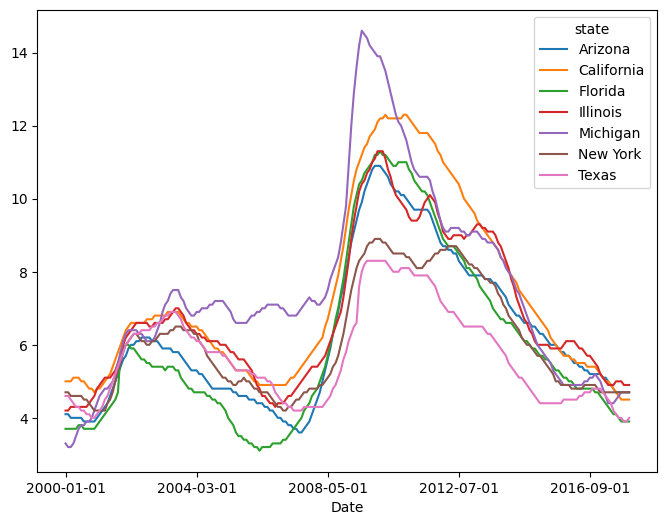

In [101]:
desemprego.plot(figsize=(8,6))

In [102]:
desemprego.index

Index(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01', '2000-05-01',
       '2000-06-01', '2000-07-01', '2000-08-01', '2000-09-01', '2000-10-01',
       ...
       '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
       '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
      dtype='object', name='Date', length=216)

<AxesSubplot:xlabel='Date'>

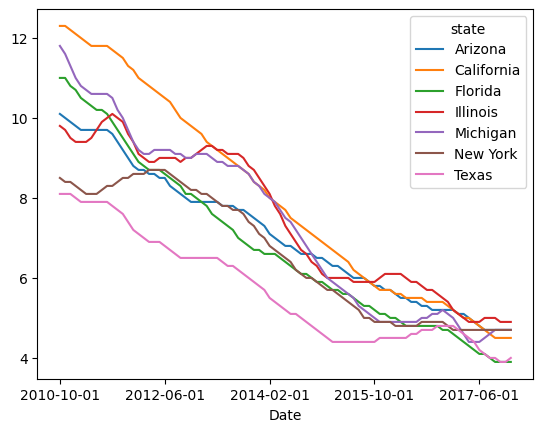

In [103]:
#filtrar dados a partir de 2010
desemprego.loc['2010-1-1':].plot()

In [104]:
desemprego.mean()

state
Arizona       6.301389
California    7.299074
Florida       6.048611
Illinois      6.822685
Michigan      7.492593
New York      6.102315
Texas         5.695370
dtype: float64

In [105]:
#alterando o axis para calcular a média mensal entre os estados selecionados
desemprego.mean(axis=1).head()

Date
2000-01-01    4.228571
2000-02-01    4.214286
2000-03-01    4.185714
2000-04-01    4.200000
2000-05-01    4.214286
dtype: float64

Descrevendo métrica própria de agregação

In [106]:
def high_or_low(data):
    if data.mean() < 6.5:
        result = 'Low'
    else:
        result = 'High'
    return result

In [107]:
desemprego.agg(high_or_low)

state
Arizona        Low
California    High
Florida        Low
Illinois      High
Michigan      High
New York       Low
Texas          Low
dtype: object

In [108]:
desemprego.agg(high_or_low,axis=1).head()

Date
2000-01-01    Low
2000-02-01    Low
2000-03-01    Low
2000-04-01    Low
2000-05-01    Low
dtype: object

In [109]:
desemprego.agg([min, high_or_low,max])

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
min,3.6,4.5,3.1,4.2,3.2,4.2,3.9
high_or_low,Low,High,Low,High,High,Low,Low
max,10.9,12.3,11.3,11.3,14.6,8.9,8.3


In [110]:
desemprego.agg([min, high_or_low,max],axis=1).head()


,min,high_or_low,max
Date,,,
2000-01-01,3.3,Low,5.0
2000-02-01,3.2,Low,5.0
2000-03-01,3.2,Low,5.0
2000-04-01,3.3,Low,5.1
2000-05-01,3.5,Low,5.1


In [111]:
desemprego.pct_change().fillna('-')

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,-,-,-,-,-,-,-
2000-02-01,0.0,0.0,0.0,0.0,-0.030303,0.0,0.0
2000-03-01,-0.02439,0.0,0.0,0.02381,0.0,-0.021277,-0.021739
2000-04-01,0.0,0.02,0.0,0.0,0.03125,0.0,-0.022222
2000-05-01,0.0,0.0,0.0,0.0,0.060606,0.0,-0.022727
...,...,...,...,...,...,...,...
2017-08-01,0.0,-0.021277,-0.02439,0.0,0.022222,0.0,-0.02439
2017-09-01,0.0,-0.021739,-0.025,0.0,0.021739,0.0,0.0
2017-10-01,0.0,0.0,0.0,-0.02,0.0,0.0,-0.025


Selecionando dados

In [112]:
np.random.seed(7)
sample = pd.DataFrame({
    'A':np.random.randint(1,100,5),
    'B':np.random.randint(1,1_000,5),
    'C':np.random.randint(500,2_000,5)
},
index = ['a','b','c','d','e'])

sample

,A,B,C
a,48,920,1035
b,69,616,845
c,26,349,866
d,68,186,1054
e,84,399,1230


iloc: seleciona valores pelo indice

In [113]:
sample.iloc[:,0]

a    48
b    69
c    26
d    68
e    84
Name: A, dtype: int32

In [114]:
sample.iloc[:4]


,A,B,C
a,48,920,1035
b,69,616,845
c,26,349,866
d,68,186,1054


In [115]:
sample.iloc[:3,0]


a    48
b    69
c    26
Name: A, dtype: int32

In [116]:
sample.iloc[1:4, [0,1]]


,A,B
b,69,616
c,26,349
d,68,186


In [117]:
sample.iloc[2:,[0,2]]


,A,C
c,26,866
d,68,1054
e,84,1230


loc: seleciona o valores pelo label

In [118]:
#sintaxe[linha,coluna]
sample.loc[:,'A']

a    48
b    69
c    26
d    68
e    84
Name: A, dtype: int32

In [119]:
sample.loc['a':'d',:]


,A,B,C
a,48,920,1035
b,69,616,845
c,26,349,866
d,68,186,1054


Selecionando valores -> at e iat

In [122]:
sample.at['a','A'] = 50
sample

,A,B,C
a,50,920,1035
b,69,616,845
c,26,349,866
d,68,186,1054
e,84,399,1230


In [123]:
# pega o valor na posição determinada
sample.iat[0,0]

50

In [125]:
sample.iat[3,1]

186

Ordenação em dataset

In [126]:
df.sort_values(by='Renda')

,Id,Idade,Renda,Sexo,Escolaridade,Cidade
51,52,48,1912,masculino,Ensino médio,Recife
40,41,43,1959,feminino,Ensino Superior,Salvador
37,38,40,2006,feminino,Ensino fundamental,Salvador
28,29,67,2034,masculino,Ensino fundamental,Salvador
98,99,58,2375,feminino,Ensino Superior,Rio de Janeiro
...,...,...,...,...,...,...
9,10,47,9452,masculino,Ensino fundamental,Curitiba
79,80,62,9466,masculino,Ensino fundamental,São Paulo
77,78,42,9552,masculino,Ensino Superior,São Paulo
16,17,54,9612,masculino,Ensino médio,Salvador


In [127]:
df.sort_values(by=['Renda','Idade'])


,Id,Idade,Renda,Sexo,Escolaridade,Cidade
51,52,48,1912,masculino,Ensino médio,Recife
40,41,43,1959,feminino,Ensino Superior,Salvador
37,38,40,2006,feminino,Ensino fundamental,Salvador
28,29,67,2034,masculino,Ensino fundamental,Salvador
98,99,58,2375,feminino,Ensino Superior,Rio de Janeiro
...,...,...,...,...,...,...
9,10,47,9452,masculino,Ensino fundamental,Curitiba
79,80,62,9466,masculino,Ensino fundamental,São Paulo
77,78,42,9552,masculino,Ensino Superior,São Paulo
16,17,54,9612,masculino,Ensino médio,Salvador


In [128]:
df.sort_values(by=['Escolaridade','Sexo'])


,Id,Idade,Renda,Sexo,Escolaridade,Cidade
1,2,54,7957,feminino,Ensino Superior,Recife
17,18,69,8429,feminino,Ensino Superior,São Paulo
18,19,34,9005,feminino,Ensino Superior,Rio de Janeiro
25,26,26,5797,feminino,Ensino Superior,Rio de Janeiro
30,31,31,8735,feminino,Ensino Superior,São Paulo
...,...,...,...,...,...,...
83,84,31,6032,masculino,Ensino médio,Salvador
90,91,29,3027,masculino,Ensino médio,Recife
92,93,30,4658,masculino,Ensino médio,Recife
95,96,67,2958,masculino,Ensino médio,Recife


In [129]:
# valores únicos 
df.Escolaridade.unique()

array(['Ensino médio', 'Ensino Superior', 'Ensino fundamental'],
      dtype=object)

In [135]:
# mapeamento dos valores na coluna escolaridade
rank_escolaridade = {
    'Ensino fundamental' : 'A',
    'Ensino médio': 'B',
    'Ensino Superior': 'C'
}
df.Escolaridade.map(rank_escolaridade).sort_values()

49    A
32    A
34    A
36    A
37    A
     ..
54    C
5     C
17    C
42    C
61    C
Name: Escolaridade, Length: 100, dtype: object

In [138]:
# ordena os dados a partir das colunas Renda e Escolaridade
df.sort_values(by=['Renda','Escolaridade']).reset_index(drop=True)

,Id,Idade,Renda,Sexo,Escolaridade,Cidade
0,52,48,1912,masculino,Ensino médio,Recife
1,41,43,1959,feminino,Ensino Superior,Salvador
2,38,40,2006,feminino,Ensino fundamental,Salvador
3,29,67,2034,masculino,Ensino fundamental,Salvador
4,99,58,2375,feminino,Ensino Superior,Rio de Janeiro
...,...,...,...,...,...,...
95,10,47,9452,masculino,Ensino fundamental,Curitiba
96,80,62,9466,masculino,Ensino fundamental,São Paulo
97,78,42,9552,masculino,Ensino Superior,São Paulo
98,17,54,9612,masculino,Ensino médio,Salvador


In [139]:
# ordena os dados a aprtir das colunas Renda e Escolaridade (outra forma da de cima)
df.sort_values(by=['Renda','Escolaridade']).reset_index().drop(columns=['index'])


,Id,Idade,Renda,Sexo,Escolaridade,Cidade
0,52,48,1912,masculino,Ensino médio,Recife
1,41,43,1959,feminino,Ensino Superior,Salvador
2,38,40,2006,feminino,Ensino fundamental,Salvador
3,29,67,2034,masculino,Ensino fundamental,Salvador
4,99,58,2375,feminino,Ensino Superior,Rio de Janeiro
...,...,...,...,...,...,...
95,10,47,9452,masculino,Ensino fundamental,Curitiba
96,80,62,9466,masculino,Ensino fundamental,São Paulo
97,78,42,9552,masculino,Ensino Superior,São Paulo
98,17,54,9612,masculino,Ensino médio,Salvador


In [140]:
df.sort_values(by=['Renda','Escolaridade','Sexo'],inplace=True)


In [141]:
df.head()

,Id,Idade,Renda,Sexo,Escolaridade,Cidade
51,52,48,1912,masculino,Ensino médio,Recife
40,41,43,1959,feminino,Ensino Superior,Salvador
37,38,40,2006,feminino,Ensino fundamental,Salvador
28,29,67,2034,masculino,Ensino fundamental,Salvador
98,99,58,2375,feminino,Ensino Superior,Rio de Janeiro


In [142]:
# reset do indice
df.reset_index(drop=True, inplace=True)